In [19]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/berk/Desktop/spaceship-titanic/cleaned_spaceship_titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   int64  
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   int64  
 13  Port          8693 non-null   int64  
dtypes: bool(3), float64(6), int64(4), object(1)
memory usage: 772.6+ KB


In [4]:
X = df.drop("Transported", axis=1).values
y = df["Transported"].values

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 13), (6954,), (1739, 13), (1739,))

In [11]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [14]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [15]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [16]:
df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score, 
                                               gb_pred_score, svc_pred_score]))

In [17]:
df

,model,accuracy
0,Logistic Regression,0.778033
1,Random Forest,0.795285
2,Gradient Boosting,0.800460
3,SVM,0.542841


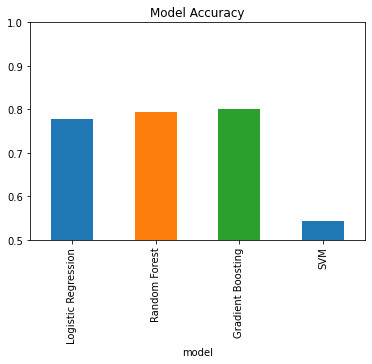

In [20]:
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);